### 과제1. k-NN 알고리즘 score 확인

1. k-NN알고리즘의 neighbor개수에 따른 score값 변화 확인  
• 1장에서 n_neighbors의 값을 49로 설정하였을 때 score()의 결과가 1보다 작았음 (정확도가 100%가 아님)  
• n_neighbors의 값을 5부터 49까지 바꾸어 가면서 score() 함수의 결과 및 n_neghbors의 값을 plot 차트로 표현하시오.

In [61]:
# 도미데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 
                30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 
                33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 
                36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 
                450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 
                700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 
                925.0, 975.0, 950.0]

In [62]:
# 빙어데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 
                12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 
                13.4, 12.2, 19.7, 19.9]

In [63]:
# 1) 도미데이터와 빙어데이터 합치기
lenght = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [64]:
# 2) 2차원 리스트로 변경
fish_data = [[l, w] for l, w in zip(lenght, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [65]:
# 3) 타겟 준비
fish_target = [1]*35 + [0]*14 # 도미 1, 빙어 0
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [66]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

neighbors = []
score = []

for i in range(5,50):
    neighbors.append(i)
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(fish_data, fish_target)
    score.append(kn.score(fish_data, fish_target))
print(neighbors)
print(score)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9591836734693877, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143]


Text(0, 0.5, 'score')

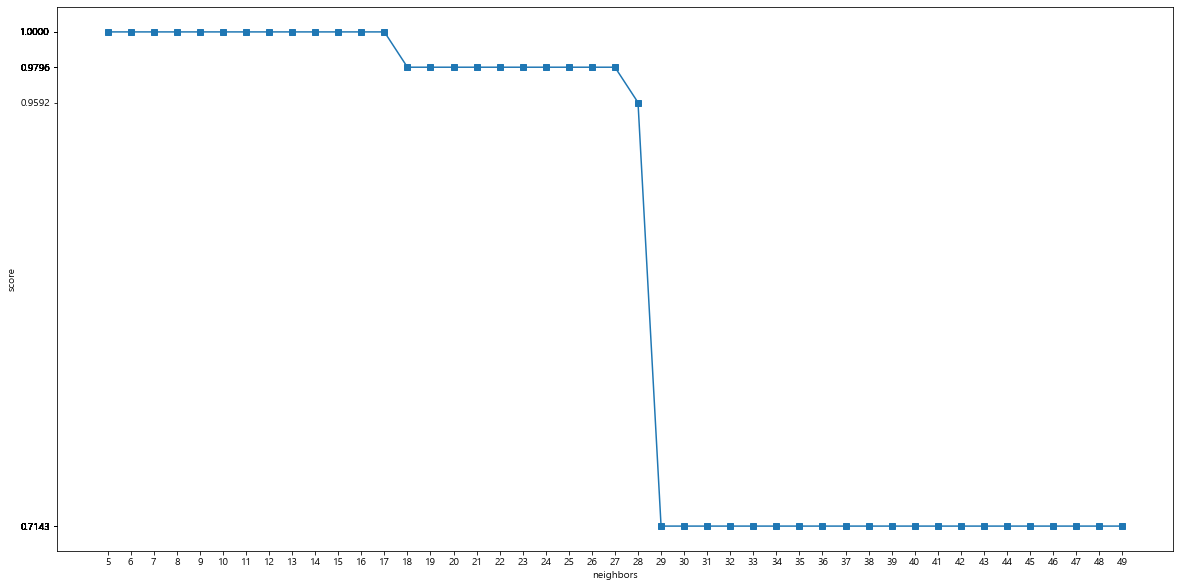

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(neighbors, score, marker='s')
plt.xticks(neighbors)
plt.yticks(score)
plt.xlabel('neighbors')
plt.ylabel('score')

2. plot()에 사용한 n_neghbors와 score값을 이용하여, n_neighbors의 개수에 대한 score값을 numpy의 column_stack()   함수를 이용하여 ndarray 타입으로 변환한 다음, 아래와 같이 pandas의 DataFrame으로 변환하여 출력하시오.

In [68]:
import numpy as np

data = np.column_stack((neighbors, score))
df = pd.DataFrame({'neighbors':data[:,0], 'score':data[:,1]}, dtype=float)
df

,neighbors,score
0,5.0,1.000000
1,6.0,1.000000
2,7.0,1.000000
3,8.0,1.000000
4,9.0,1.000000
5,10.0,1.000000
6,11.0,1.000000
7,12.0,1.000000
8,13.0,1.000000
9,14.0,1.000000
